# Overview of the routines in `biosspheres.quadratures`

## Preliminaries

### Spherical coordinate system

A vector is written as $\mathbf{r}=\left(r,\varphi,\theta\right)^t$, with $r \in [0,\infty)$, $\varphi \in [0,2\pi)$ and $\theta \in [0,\pi]$, which in Cartesian coordinates is equivalent to $\mathbf{r}=r\left(\sin \theta \cos \varphi,\sin \theta \sin \varphi,\cos \theta\right)^t$. The unitary vectors of the spherical coordinate system can be written in Cartesian coordinates as
$$\begin{align*}
    &\widehat{\mathbf{e}}_r= (\sin \theta \cos \varphi , \sin \theta \sin \varphi , \cos \theta )^t, \\
    &\widehat{\mathbf{e}}_\theta=(\cos \theta \cos \varphi , \cos \theta \sin \varphi , -\sin \theta  )^t, \\
    &\widehat{\mathbf{e}}_{\varphi}=(-\sin \varphi , \cos \varphi , 0 )^t.
\end{align*}$$

Also, the gradient operator in spherical coordinates:
$$\begin{align*}
    \nabla f&=\frac{\partial f}{\partial r} \widehat{\mathbf{e}}_r+\frac{1}{r} \frac{\partial f}{\partial \theta} \widehat{\mathbf{e}}_\theta+\frac{1}{r \sin \theta} \frac{\partial f}{\partial \varphi} \widehat{\mathbf{e}}_{\varphi}
\end{align*}$$

### Real spherical harmonics

Real spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$\begin{align}
		 Y_{l,m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0}) \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \cos m \varphi , \mbox{ and}\\
		Y_{l,-m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0})\frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \sin m \varphi ,
\end{align}$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise. $P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x), \quad \mbox{with} \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

## `sphere.gauss_legendre_trapezoidal_2d`

This function is for obtaining the quadratures points to approximate numerically the integral in a surface of a sphere. In this case they are given in a two dimensional array (three dimensional if we add the dimension needed to represent a vector).

In this case, a Gauss-Legendre quadrature is used in the $\theta$ variable, and a composed trapezoidal rule in $\varphi$.

We use the points used by the library SHTOOLS, see [Grid formats shtools](https://shtools.github.io/SHTOOLS/grid-formats.html).

This function needs one parameter `big_l_c`. Without considering errors produced by the approximation by finite numbers, the quadrature must be exact for functions consisting in polynomials of `big_l_c` degree times $e^{im}$, with $|m| <= $ `big_l_c`.

In [1]:
import biosspheres.quadratures.sphere as quadratures

In [2]:
big_l_c = 15

In [3]:
quantity_theta_points, quantity_phi_points, weights, pre_vector = quadratures.gauss_legendre_trapezoidal_2d(big_l_c)

Here:
- quantity_theta_points : int, how many points for the integral in theta, (`big_l_c` + 1).
- quantity_phi_points : int, how many points for the integral in phi, (2`big_l_c` + 1).
- weights : np.ndarray of floats, with the weights for the integral quadrature in theta.
- pre_vector : np.ndarray of floats. Represents the vectors of the quadrature points. Shape (3, quantity_theta_points, quantity_phi_points).

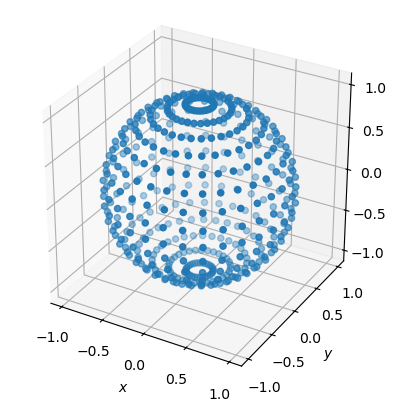

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
vector = pre_vector
fig = plt.figure()
ax_1 = fig.add_subplot(111, projection='3d')
ax_1.scatter3D(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :])
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
plt.show()

## `gauss_legendre_trapezoidal_1d`

This function is the same almost the same than `gauss_legendre_trapezoidal_2d`, with the difference that the vectors are given in an array of one dimension (two if we add the dimension needed for represent a vector).

In [5]:
big_l_c = 15
final_length, total_weights, pre_vector = quadratures.gauss_legendre_trapezoidal_1d(big_l_c)

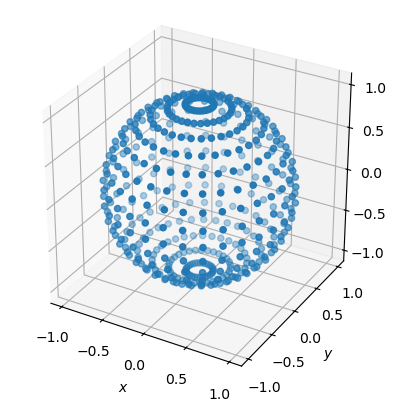

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
vector = pre_vector
fig = plt.figure()
ax_1 = fig.add_subplot(111, projection='3d')
ax_1.scatter3D(
    vector[0, :],
    vector[1, :],
    vector[2, :])
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
plt.show()